# Moving Average Process 

In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt, dates as mdates, ticker as mticker
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../../My-Code/')

import timetools as tt

%matplotlib inline

In [2]:
# plt.rcParams['figure.figsize'] = (10, 7.5)
plt.style.use('seaborn')

## Simulate MA(2) process 

$ y_t = 0.9Z_{t-1} + 0.3Z_{t-2} $

In [3]:
ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, 0, 0])

print(ma2)
print(ar2)

[1.  0.9 0.3]
[1 0 0]


In [4]:
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

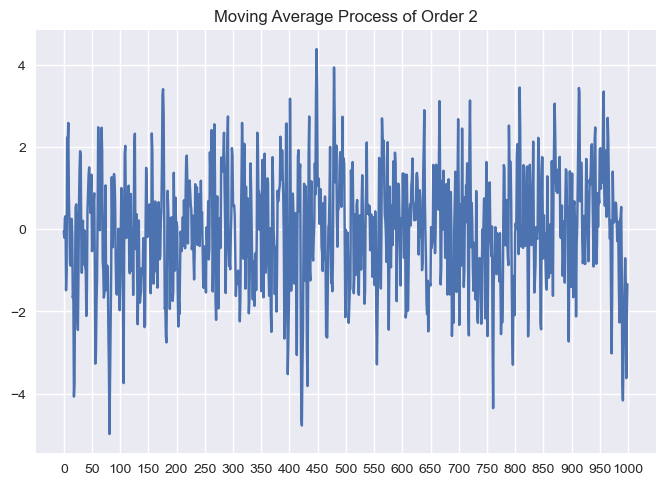

In [5]:
fig, ax = plt.subplots()
ax.plot(MA2_process)
ax.set_title('Moving Average Process of Order 2')
ax.xaxis.set_major_locator(mticker.FixedLocator(np.arange(0, 1050, 50)))
plt.show()

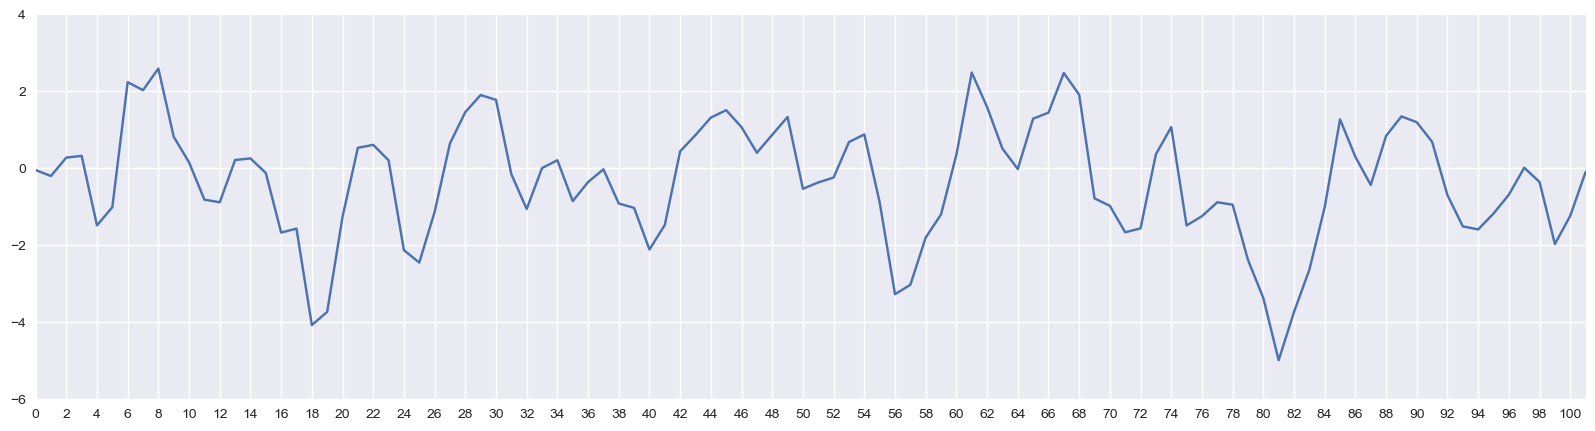

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(MA2_process[:102])
ax.xaxis.set_major_locator(mticker.FixedLocator(np.arange(0, 106, 2)))
ax.margins(0)
ax.set_ylim(-6, 4)
plt.show()

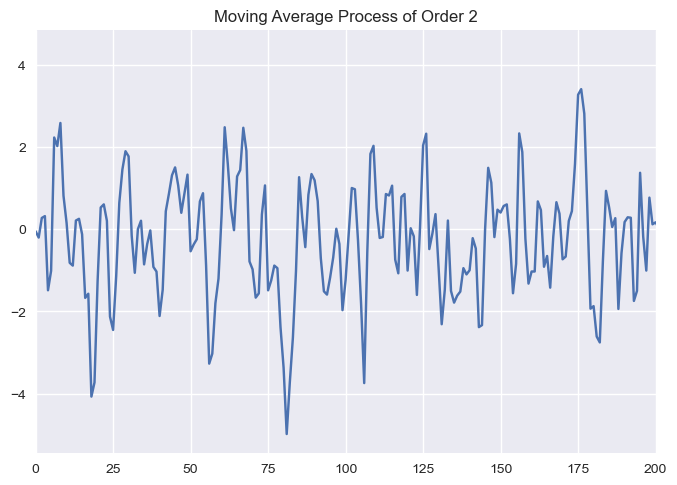

In [7]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.xlim(0, 200)
plt.show()

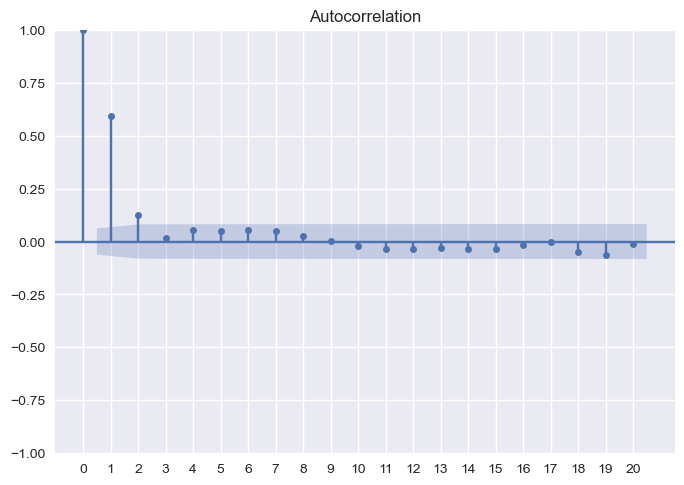

In [8]:
fig, ax = plt.subplots()
plot_acf(MA2_process, lags=20, ax=ax)
ax.xaxis.set_major_locator(mticker.FixedLocator(np.arange(0, 21)))
plt.show()

In [9]:
MA_model = ARIMA(MA2_process, order=(0,0,2), enforce_stationarity=False).fit()

print(MA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1439.570
Date:                Sat, 07 Jan 2023   AIC                           2887.139
Time:                        14:12:38   BIC                           2906.758
Sample:                             0   HQIC                          2894.597
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0140      0.071     -0.197      0.844      -0.153       0.125
ma.L1          0.9082      0.031     29.513      0.000       0.848       0.969
ma.L2          0.2742      0.031      8.860      0.0